### Task 2 
* Invovles generating clusters from the world indicators dataset
* The dataset is cleaned by removing the Columns containing the maximum percentage of Null values which are Lending Interest, Energy Usage 
* Boxplots for all the numerical variables are plotted to see the presence of outliers
* Silhouette Score , Silhouette Analysis is used to determine the optimal number of clusters
* Kmeans and heirarchical clustering is used to generate the clusters and visualised throug 2d plots 
* Description of the clusters formed and the countries present in them 

#### The internal validation metrics used are 
* Silhouette Score
* SSE or Inertia
* Dunn Index
* CH ratio

#### Silhouette Score
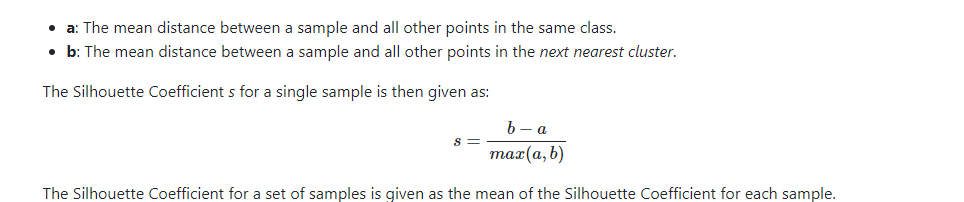

#### Dunn Index
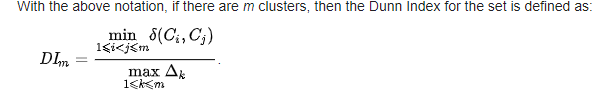

In [ ]:
!pip install yellowbrick # Installing yellowbrick library for generating silhouette plots

In [42]:
# loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances
from validclust import dunn

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('./Data/World Indicators.csv')

In [5]:
df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [6]:
df.shape # The data frame 208 rows and 20 columns 

(208, 20)

In [7]:
df.columns # checking the column names 

Index(['Birth Rate', 'Business Tax Rate', 'Days to Start Business',
       'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita',
       'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage',
       'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Urban', 'Region', 'Country'],
      dtype='object')

#### There are columns with object datatype but have flost values present 

In [8]:
df.dtypes # Checking the datatypes of the columns 

Birth Rate                float64
Business Tax Rate          object
Days to Start Business    float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

In [9]:
df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


#### The columns "Business Tax Rate","GDP","Health Exp/Capita" are float datatypes with Special characters in them 

In [10]:
# Removing the special characters from the columns
df['Business Tax Rate']=df['Business Tax Rate'].str.replace("%","")
df['Health Exp/Capita']=df['Health Exp/Capita'].str.replace("$","")
df['Health Exp/Capita']=df['Health Exp/Capita'].str.replace(",","")
df['GDP']=df['GDP'].str.replace("$","")
df['GDP']=df['GDP'].str.replace(",","")
#renaming te columns to retain the context of data
df.rename(columns={'GDP':"GDP_dollar","Business Tax Rate":"Business_tax_rate_percent","Health Exp/Capita":"Health_Exp_Capita_dollar"},inplace=True)

In [11]:
df.head()

,Birth Rate,Business_tax_rate_percent,Days to Start Business,Energy Usage,GDP_dollar,Health Exp % GDP,Health_Exp_Capita_dollar,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,41852.0,199070864638,0.044,233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,13576.0,104115863405,0.034,178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,3761.0,7294900431,0.045,34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,2215.0,15292424757,0.052,404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,NaN,10395757480,0.064,39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [12]:
#Changing the datatypes of the columns
df['GDP_dollar']=df['GDP_dollar'].astype(float)
df["Business_tax_rate_percent"]=df["Business_tax_rate_percent"].astype(float)
df["Health_Exp_Capita_dollar"]=df["Health_Exp_Capita_dollar"].astype(float)

In [13]:
df.dtypes

Birth Rate                   float64
Business_tax_rate_percent    float64
Days to Start Business       float64
Energy Usage                 float64
GDP_dollar                   float64
Health Exp % GDP             float64
Health_Exp_Capita_dollar     float64
Hours to do Tax              float64
Infant Mortality Rate        float64
Internet Usage               float64
Lending Interest             float64
Life Expectancy Female       float64
Life Expectancy Male         float64
Mobile Phone Usage           float64
Population 0-14              float64
Population 15-64             float64
Population 65+               float64
Population Urban             float64
Region                        object
Country                       object
dtype: object

In [14]:
df['Region'].unique() # Seeing the unique regions in the dataset

array(['Africa', 'Asia', 'Europe', 'Middle East', 'Oceania',
       'The Americas'], dtype=object)

In [15]:
df['Country'].nunique() # Total 208 objects present 

208

#### There are a total of six regions present in the dataset and 208 countries 

In [16]:
df.describe()

,Birth Rate,Business_tax_rate_percent,Days to Start Business,Energy Usage,GDP_dollar,Health Exp % GDP,Health_Exp_Capita_dollar,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
count,199.000000,181.000000,181.000000,1.360000e+02,1.880000e+02,185.000000,185.000000,180.000000,188.000000,199.000000,131.000000,197.000000,197.000000,196.000000,191.000000,191.000000,191.000000,206.000000
mean,0.021759,44.643094,30.331492,9.223794e+04,3.767045e+11,0.067362,1094.464865,279.283333,0.027340,0.376884,0.122588,72.746193,68.035533,0.958673,0.286963,0.635550,0.077424,0.576728
std,0.010721,35.988948,56.584357,3.125758e+05,1.397271e+12,0.028462,1881.466019,247.783296,0.025358,0.284034,0.079495,10.091750,8.868297,0.431784,0.107775,0.071489,0.052995,0.244372
min,0.008000,8.400000,1.000000,7.650000e+02,1.707000e+08,0.017000,12.000000,12.000000,0.002000,0.000000,0.005000,45.000000,45.000000,0.000000,0.119000,0.475000,0.003000,0.089000
25%,0.012000,30.200000,9.000000,5.699000e+03,6.919676e+09,0.047000,87.000000,151.750000,0.007000,0.100000,0.074500,67.000000,62.000000,0.700000,0.189000,0.581000,0.034000,0.377750
50%,0.019000,38.800000,18.000000,1.808200e+04,2.698363e+10,0.065000,311.000000,224.000000,0.016000,0.400000,0.106000,76.000000,70.000000,1.000000,0.279000,0.654000,0.056000,0.571500
75%,0.028000,48.400000,35.000000,5.155725e+04,2.027246e+11,0.085000,928.000000,327.000000,0.042250,0.600000,0.150000,80.000000,75.000000,1.200000,0.382500,0.684500,0.118000,0.772500
max,0.050000,339.100000,694.000000,2.727728e+06,1.553380e+13,0.177000,9908.000000,2600.000000,0.112000,0.900000,0.525000,87.000000,81.000000,2.500000,0.499000,0.857000,0.237000,1.000000


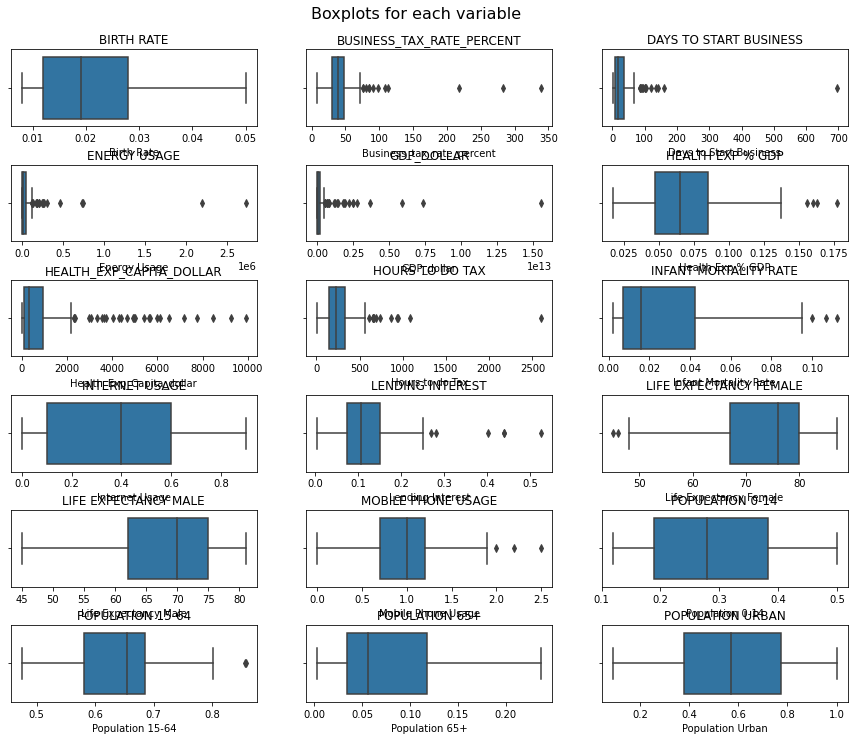

In [18]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Boxplots for each variable", fontsize=16, y=0.93)

# loop through the column names and track the axes
for n, col_name in enumerate(df.columns[:-2]):
    # add a new subplot iteratively
    ax = plt.subplot(6, 3, n + 1)    
    sns.boxplot(df['{}'.format(col_name)],ax=ax)    
    ax.set_title(col_name.upper())

#### From boxplots we can see the following variables have outliers present
* Business_Tax_Rate_percent
* Days to Start Business
* Energy Usage
* GDP_Dollar
* Health EXP % GDP
* Health_Exp_Capita_Dollar
* Hours to do Tax
* Infant Mortality Rate
* Lending Interst
* Life expectancy Female
* Mobile Phone Usage
* Population 15-64

#### Plotting the Histograms for variables

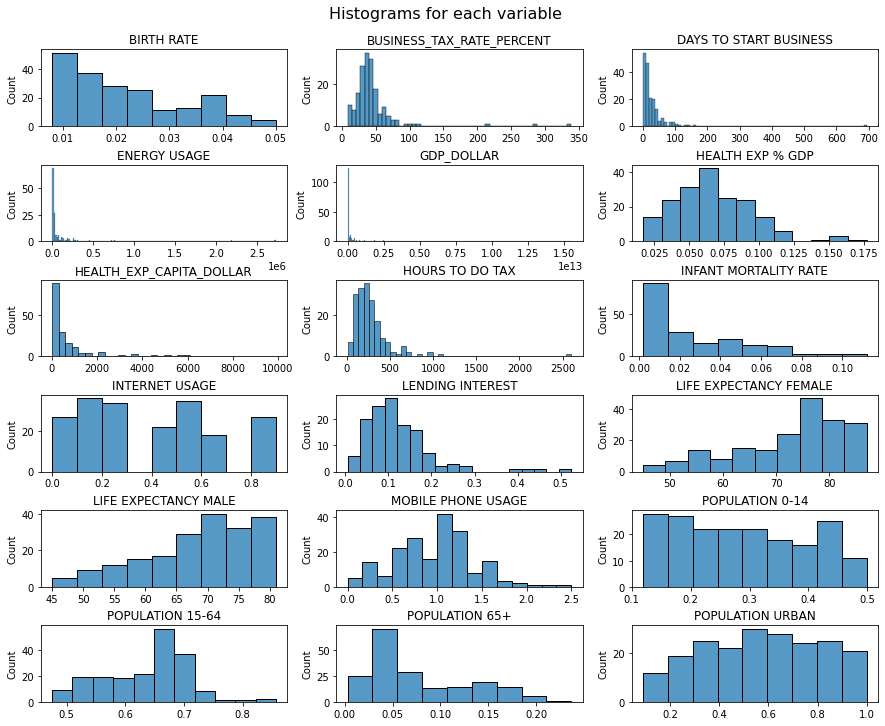

In [20]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Histograms for each variable", fontsize=16, y=0.93)

# loop through the column names and track the axes
for n, col_name in enumerate(df.columns[:-2]):
    # add a new subplot iteratively
    ax = plt.subplot(6, 3, n + 1)    
    sns.histplot(df['{}'.format(col_name)],ax=ax)    
    ax.set_title(col_name.upper())
    ax.set_xlabel("")

#### Generating 3 Scatter Plots

In [18]:
df.columns

Index(['Birth Rate', 'Business_tax_rate_percent', 'Days to Start Business',
       'Energy Usage', 'GDP_dollar', 'Health Exp % GDP',
       'Health_Exp_Capita_dollar', 'Hours to do Tax', 'Infant Mortality Rate',
       'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Urban', 'Region',
       'Country'],
      dtype='object')

Text(0, 0.5, 'Life Expectancy Female')

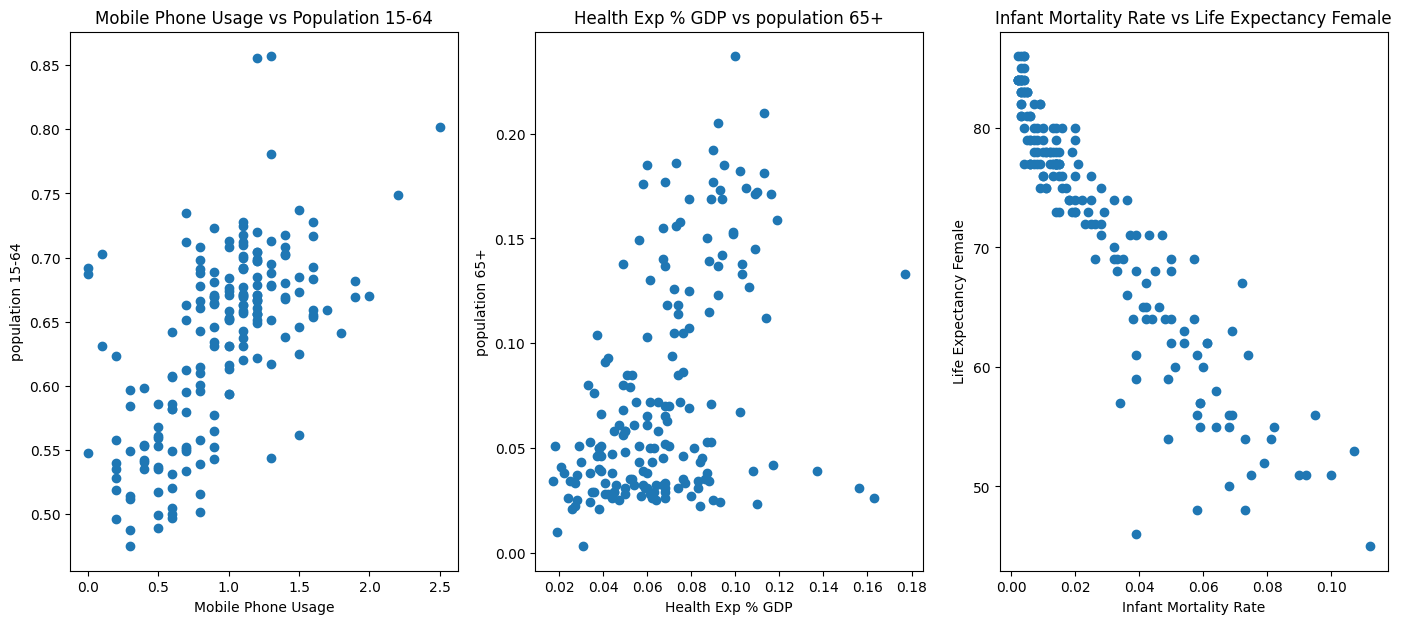

In [135]:
# Using subplots to generate three plots with different variables from the 
plt.figure(figsize=(17,7),facecolor="white")
plt.subplot(1,3,1)
plt.scatter(df['Mobile Phone Usage'],df['Population 15-64']) # Using Mobile Phone Usage, Population 15-64
plt.title("Mobile Phone Usage vs Population 15-64")          # Setting the title
plt.xlabel("Mobile Phone Usage")                             # Setting xlabel
plt.ylabel("population 15-64")                               # Setting y label

plt.subplot(1,3,2) 
plt.scatter(df['Health Exp % GDP'],df['Population 65+'])    # Using Health Exp % GDP, Population 65+
plt.title("Health Exp % GDP vs population 65+")             # Setting the title
plt.xlabel("Health Exp % GDP")                              # Setting xlabel
plt.ylabel("population 65+")                                # Setting ylabel


plt.subplot(1,3,3) 
plt.scatter(df['Infant Mortality Rate'],df['Life Expectancy Female'])  # Using Infant Mortality Rate, Life Expectancy Female
plt.title("Infant Mortality Rate vs Life Expectancy Female")           # Setting the title
plt.xlabel("Infant Mortality Rate")                                    # Setting the xlabel 
plt.ylabel("Life Expectancy Female")                                   # Setting the ylabel

#### Checking the Number of Null values

In [21]:
round(df.isna().sum()/df.shape[0]*100,2)  # % of Null values present in the df for each column 

Birth Rate                    4.33
Business_tax_rate_percent    12.98
Days to Start Business       12.98
Energy Usage                 34.62
GDP_dollar                    9.62
Health Exp % GDP             11.06
Health_Exp_Capita_dollar     11.06
Hours to do Tax              13.46
Infant Mortality Rate         9.62
Internet Usage                4.33
Lending Interest             37.02
Life Expectancy Female        5.29
Life Expectancy Male          5.29
Mobile Phone Usage            5.77
Population 0-14               8.17
Population 15-64              8.17
Population 65+                8.17
Population Urban              0.96
Region                        0.00
Country                       0.00
dtype: float64

#### The columns with the maximum Null values are Lending Interest and Energy Usage 

#### Rmoving the columns with maximum Null values to perform Clustering

In [22]:
df_cluster=df.drop(["Lending Interest","Energy Usage"],axis=1) # dropping the columns with highest % of NUll values

In [23]:
df_cluster.shape # We can see the 2 columns have been dropped 

(208, 18)

In [24]:
#Checking for Null Values 
round(df_cluster.isna().sum()/df.shape[0]*100,2)

Birth Rate                    4.33
Business_tax_rate_percent    12.98
Days to Start Business       12.98
GDP_dollar                    9.62
Health Exp % GDP             11.06
Health_Exp_Capita_dollar     11.06
Hours to do Tax              13.46
Infant Mortality Rate         9.62
Internet Usage                4.33
Life Expectancy Female        5.29
Life Expectancy Male          5.29
Mobile Phone Usage            5.77
Population 0-14               8.17
Population 15-64              8.17
Population 65+                8.17
Population Urban              0.96
Region                        0.00
Country                       0.00
dtype: float64

 As we can see there are still Null values present in the dataset in other columns 

In [25]:
df_cluster[df_cluster.isna().any(axis=1)].shape # No of rows whih have Null present in any of the columns 

(37, 18)

#### 37 rows or 17.8 % of data will be lost if all the rows containing NaNs are dropped

In [26]:
df_cluster_dropped=df_cluster.dropna() # Dropping the rows with NaN Values

In [27]:
round(df_cluster_dropped.isna().sum()/df_cluster_dropped.shape[0]*100,2)

Birth Rate                   0.0
Business_tax_rate_percent    0.0
Days to Start Business       0.0
GDP_dollar                   0.0
Health Exp % GDP             0.0
Health_Exp_Capita_dollar     0.0
Hours to do Tax              0.0
Infant Mortality Rate        0.0
Internet Usage               0.0
Life Expectancy Female       0.0
Life Expectancy Male         0.0
Mobile Phone Usage           0.0
Population 0-14              0.0
Population 15-64             0.0
Population 65+               0.0
Population Urban             0.0
Region                       0.0
Country                      0.0
dtype: float64

#### There are no Null values present in the data after dropping the rows with the Null values  

In [28]:
df_cluster_dropped.head()

,Birth Rate,Business_tax_rate_percent,Days to Start Business,GDP_dollar,Health Exp % GDP,Health_Exp_Capita_dollar,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


#### Scaling the data as some of the variable such as GDP, Health_Exp_Capita_dollar and others are on different scales

In [28]:
from sklearn.preprocessing import MinMaxScaler #Importing Min Max Scaler

In [29]:
df_cluster_dropped.iloc[:,:-2].head() # Subsetting the Numberic Columns

,Birth Rate,Business_tax_rate_percent,Days to Start Business,GDP_dollar,Health Exp % GDP,Health_Exp_Capita_dollar,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265


In [30]:
scale=MinMaxScaler()                                                           # Intialising MinMaxScaler Object 
df_scaled=pd.DataFrame(scale.fit_transform(df_cluster_dropped.iloc[:,:-2]))    # fit transform to the numerical dataset (Subsetting all columns other than Region,Country) 
df_scaled.columns=df_cluster_dropped.iloc[:,:-2].columns                       # assigning the column names 

In [31]:
df_scaled.head()

,Birth Rate,Business_tax_rate_percent,Days to Start Business,GDP_dollar,Health Exp % GDP,Health_Exp_Capita_dollar,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933
1,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262
2,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630
3,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503
4,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194


### Checking for duplicates

In [32]:
df_scaled[df_scaled.duplicated()] # CHecking for Null values 

,Birth Rate,Business_tax_rate_percent,Days to Start Business,GDP_dollar,Health Exp % GDP,Health_Exp_Capita_dollar,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban


#### There are no duplicate rows present as the result is empty

### K-means Clustering

In [33]:
from sklearn.cluster import KMeans # importing Kmeans from scikit learn 
l=[] # generating a empty list to append the SSE of each cluster formed
for k in range(1,10): # Runnign the for loop with number of clusters
    world_model = KMeans(n_clusters=k)  # generating the model object
    world_model.fit(df_scaled)          # fitting to the data
    l.append(world_model.inertia_)      # appending the inertia (Sum of Squared Errors) to the list


Text(0, 0.5, 'inertia(SSE)')

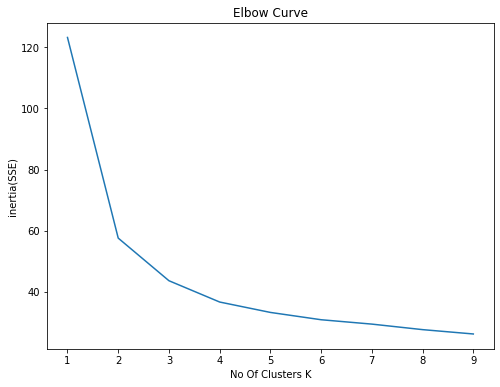

In [34]:
#plotting the Elbow curve using the list made previously
plt.figure(figsize=(8,6))     # Setting the figure size
plt.plot(list(range(1,10)),l)  # generating the plot
plt.title("Elbow Curve")       # setting title
plt.xlabel("No Of Clusters K")  # setting xlabel
plt.ylabel("inertia(SSE)")      # setting ylabel

#### From the elbow curve we can see that there is a high change in slope when k=2

In [36]:
# running the kmenas with different number of clusters and generating silhouette score 
from sklearn import metrics
from sklearn.cluster import KMeans
s_score=[] # empty list to append silhouette score

for k in range(2,10): # running the for starting form 2 as silhouette score requires minimum 2 cluster
    sscore = KMeans(n_clusters=k)   #generating model object
    sscore.fit(df_scaled)           # fitting the model to the data
    sscore.labels_                                                       
    s_score.append(metrics.silhouette_score(df_scaled, sscore.labels_))  # generating the silhouette score
    

Text(0, 0.5, 'Silhouette Score')

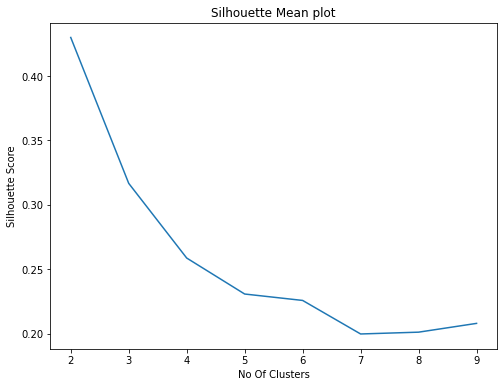

In [37]:
#plotting the data for Average silhouette Score
plt.figure(figsize=(8,6))           # setting the size of the plot
plt.plot(list(range(2,10)),s_score) #plotting the clusters vs Avg silhouette score
plt.title("Silhouette Mean plot")   # setting title
plt.xlabel("No Of Clusters")        # setting xlabel
plt.ylabel("Silhouette Score")      # setting ylabel

<Figure size 576x396 with 0 Axes>

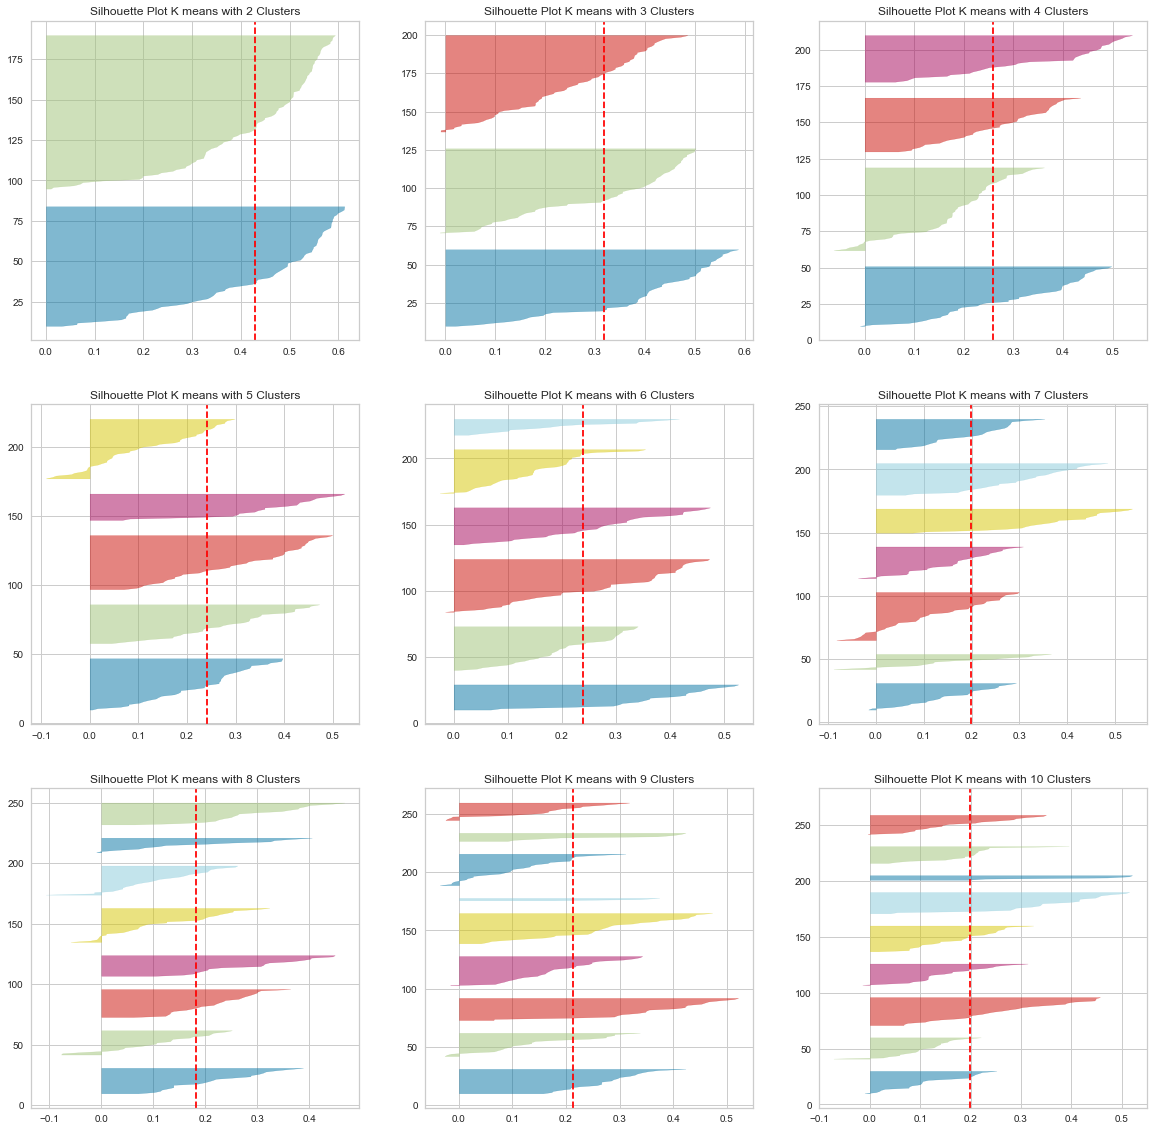

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer # USing yellow bricks library to import Visualiser for silhouette analysis
plt.subplots_adjust(hspace=0.5)    # setting the plot for subplots
plt.figure(figsize=(20, 20))        # setting size of the whole ploy
count=0                             # using count to set up subplot number
for i in [2, 3, 4, 5, 6,7,8,9,10]:   # list of clusters to iterate over    
    model = KMeans(n_clusters=i, random_state=1280) # initialising the model object
    ax1 = plt.subplot(3, 3, count+1 )               # selecting the subplot to plot on
    ax1.set_title('Silhouette Plot K means with {} Clusters'.format(i)) #setting title
    vis = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax1)  # plotting the Visualisation
    count+=1 
    vis.fit(df_scaled) 

* Although the average Silhouette Score is higher for k=2, The cluster size is not consistent among the clusters
* For K=3 The clusters dont have high fluctuations in size 
* For the other plots the cluster size varies largely, Hence k=3 should be be optimal number of clusters

#### Analysing the Silhouette score Indicates that 3 clusters are the optimal number of clusters

#### Running Kmeans algorithm multiple times to ensure global optima is reached

In [43]:
from sklearn.cluster import KMeans # importing K means
dist_Kmeans = pairwise_distances(df_scaled) # assigning pairwise distances to calculate dunn index
prev_dunn=0    # intitialising variable to find out the maximum dunn index value
for i in range(1,21):   # running the Kmeans algorithm 21 time to ensure random initialisation reaches gloabl optima
    C_final = KMeans(n_clusters=3,init="random")  # intialising model object
    C_final.fit(df_scaled)                        # fitting the model to the data
    C_final.labels_  
    res_score=dunn(dist_Kmeans,C_final.labels_)   # Calculating dunn idea
    print("Dunn Score for Iter " + str(i) + " {}".format(res_score))
    if(res_score>prev_dunn):
        best_model=C_final           # Assigning the model object with highest dunn score

Dunn Score for Iter 1 0.150141439870042
Dunn Score for Iter 2 0.150141439870042
Dunn Score for Iter 3 0.150141439870042
Dunn Score for Iter 4 0.150141439870042
Dunn Score for Iter 5 0.150141439870042
Dunn Score for Iter 6 0.150141439870042
Dunn Score for Iter 7 0.150141439870042
Dunn Score for Iter 8 0.150141439870042
Dunn Score for Iter 9 0.150141439870042
Dunn Score for Iter 10 0.150141439870042
Dunn Score for Iter 11 0.150141439870042
Dunn Score for Iter 12 0.150141439870042
Dunn Score for Iter 13 0.150141439870042
Dunn Score for Iter 14 0.150141439870042
Dunn Score for Iter 15 0.150141439870042
Dunn Score for Iter 16 0.150141439870042
Dunn Score for Iter 17 0.150141439870042
Dunn Score for Iter 18 0.150141439870042
Dunn Score for Iter 19 0.150141439870042
Dunn Score for Iter 20 0.150141439870042


#### The Kmeans algorithm has reached a global minima as it provides the same value for each random intialization

In [44]:
df_cluster_dropped['Cluster_Label_Kmeans']=best_model.labels_ # assigning the label for the best model 

#### Plotting the Clusters generated using Kmeans using three variables

Text(0, 0.5, 'Life Expectancy Female')

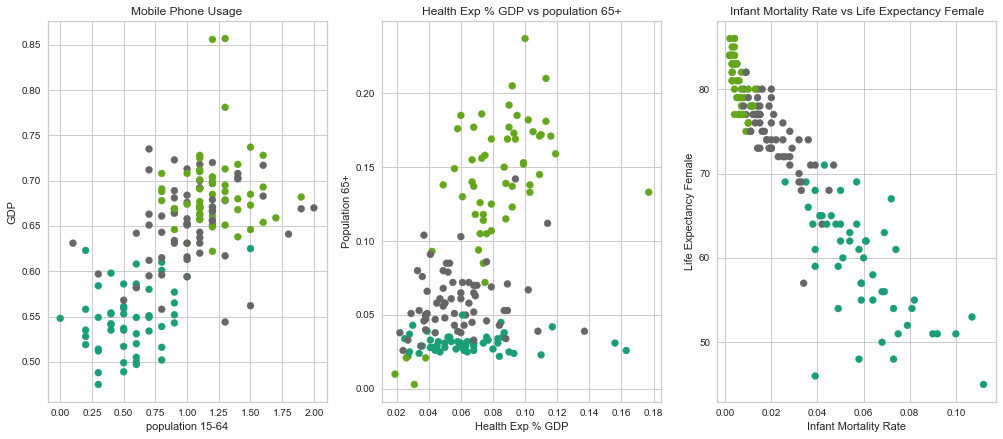

In [45]:
plt.figure(figsize=(17,7),facecolor="white")
plt.subplot(1,3,1)
plt.scatter(df_cluster_dropped['Mobile Phone Usage'],df_cluster_dropped['Population 15-64'],c=df_cluster_dropped['Cluster_Label_Kmeans'],cmap="Dark2")
plt.title("Mobile Phone Usage")
plt.xlabel("population 15-64")
plt.ylabel("GDP")

plt.subplot(1,3,2) 
plt.scatter(df_cluster_dropped['Health Exp % GDP'],df_cluster_dropped['Population 65+'],c=df_cluster_dropped['Cluster_Label_Kmeans'],cmap="Dark2")
plt.title("Health Exp % GDP vs population 65+")
plt.xlabel("Health Exp % GDP")
plt.ylabel("Population 65+")



plt.subplot(1,3,3) 
plt.scatter(df_cluster_dropped['Infant Mortality Rate'],df_cluster_dropped['Life Expectancy Female'],c=df_cluster_dropped['Cluster_Label_Kmeans'],cmap="Dark2")
plt.title("Infant Mortality Rate vs Life Expectancy Female")
plt.xlabel("Infant Mortality Rate")
plt.ylabel("Life Expectancy Female")

* The clusters can be seen clearly in the Infant Mortality Rate and Life Expectancy Female graph , seemingly classifying into 
* Low Life expectancy , High infant mortality 
* Medium Life expectancy, Medium Inant Mortality 
* High Life Expectancy, Low Infant Mortality 

#### Heirarchical Clustering

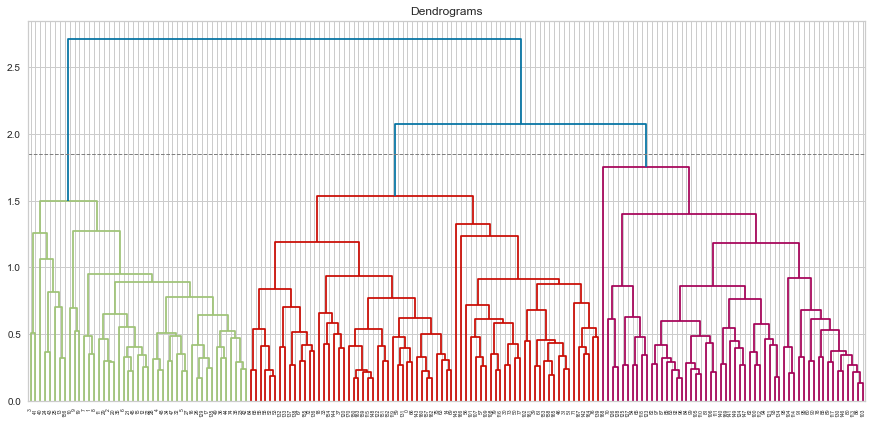

In [46]:
import scipy.cluster.hierarchy as shc # importing heirarchical clustering method
plt.figure(figsize=(15, 7)) # Setting up  the plot
plt.title("Dendrograms")     # Setting the title
dend = shc.dendrogram(shc.linkage(df_scaled, method='complete'),) # generating dendogram
plt.axhline(y=1.85, c='grey', lw=1, linestyle='dashed')            # Drrawing the line to generate number of clusters

#### The Dendogram is plotted using the linkage method as complete which is the maximum intercluster dissimilarity 

In [47]:
from sklearn.cluster import AgglomerativeClustering   # importing Agglomerative Clustering to run heirarchical clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')   # Using euclidan distance as distance metric and complete linkage to calcualte intr cluster distances
cluster.fit_predict(df_scaled) # Generating the cluster labels

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2], dtype=int64)

#### Heirarchical Clustering was performed using the distance measure as euclidean distances  and linkage criteria as complete 

In [49]:
df_cluster_dropped['Cluster_Label_heirarchical']=cluster.labels_ # Assigning the cluster labels

In [48]:
df_cluster_dropped.head() # Visualising the data frame with the clusteres labels 

,Birth Rate,Business_tax_rate_percent,Days to Start Business,GDP_dollar,Health Exp % GDP,Health_Exp_Capita_dollar,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,Cluster_Label_Kmeans
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria,2
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola,0
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin,0
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana,0
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso,0


Text(0, 0.5, 'Life Expectancy Female')

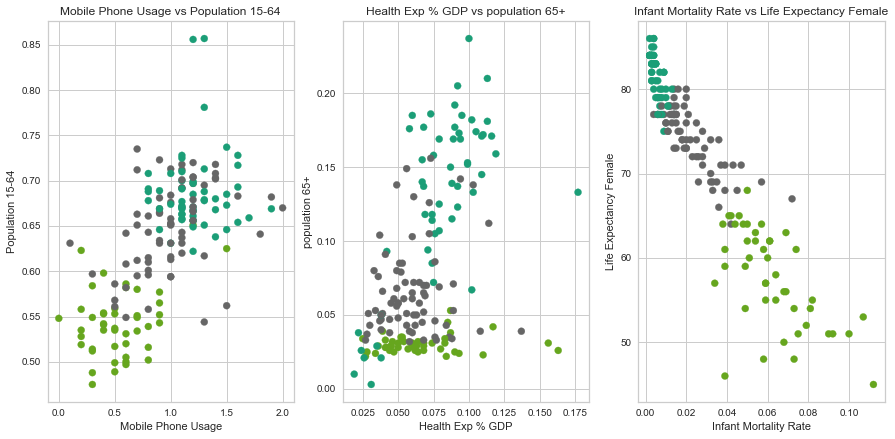

In [50]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.scatter(df_cluster_dropped['Mobile Phone Usage'],df_cluster_dropped['Population 15-64'],c=df_cluster_dropped['Cluster_Label_heirarchical'],cmap="Dark2")
plt.title("Mobile Phone Usage vs Population 15-64")
plt.xlabel("Mobile Phone Usage")
plt.ylabel("Population 15-64")


plt.subplot(1,3,2) 
plt.scatter(df_cluster_dropped['Health Exp % GDP'],df_cluster_dropped['Population 65+'],c=df_cluster_dropped['Cluster_Label_heirarchical'],cmap="Dark2")
plt.title("Health Exp % GDP vs population 65+")
plt.xlabel("Health Exp % GDP")
plt.ylabel("population 65+")



plt.subplot(1,3,3) 
plt.scatter(df_cluster_dropped['Infant Mortality Rate'],df_cluster_dropped['Life Expectancy Female'],c=df_cluster_dropped['Cluster_Label_heirarchical'],cmap="Dark2")
plt.title("Infant Mortality Rate vs Life Expectancy Female")
plt.xlabel("Infant Mortality Rate")
plt.ylabel("Life Expectancy Female")

In [51]:
CH_Score_Kmeans=sklearn.metrics.calinski_harabasz_score(df_scaled, df_cluster_dropped['Cluster_Label_Kmeans'])
CH_Score_heirarchical=sklearn.metrics.calinski_harabasz_score(df_scaled, df_cluster_dropped['Cluster_Label_heirarchical'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Generating External validation metrics CH ratio, Dunn Index for the clusters generated 

In [52]:
print('CH Score for 3 Clusters generated through K-means:',CH_Score_Kmeans) # CH Score for Kemans
print('CH Score 3 clusters using heirarchical method',CH_Score_heirarchical) # CH score for heirarchical

CH Score for 3 Clusters generated through K-means: 152.62917885628985
CH Score 3 clusters using heirarchical method 139.35756134665536


In [53]:
dist_pairwise = pairwise_distances(df_scaled)                                               # calculating pairwise distances
dunn_Kmeans = dunn(dist_pairwise,  df_cluster_dropped['Cluster_Label_Kmeans'])              # calculating dunn index for Kmeans  
dunn_heirarchical = dunn(dist_pairwise,  df_cluster_dropped['Cluster_Label_heirarchical'])  # calculating dunn index for heirarchical
print('Dunn Index for clusters generated Using Kmeans: '+ str(dunn_Kmeans))                 
print('Dunn Index for clusters generated by heirarchical clustering: '+ str(dunn_heirarchical))  

Dunn Index for clusters generated Using Kmeans: 0.150141439870042
Dunn Index for clusters generated by heirarchical clustering: 0.15768966259409103


#### Analysing the clusters formed through Kmeans

#### The regions represented in each cluster by Kmeans

In [56]:
df_cluster_dropped[df_cluster_dropped["Cluster_Label_Kmeans"]==0]['Region'].unique() # Subsetting for one cluster and taking unique values

array(['Africa', 'Asia', 'Middle East', 'Oceania', 'The Americas'],
      dtype=object)

In [57]:
df_cluster_dropped[df_cluster_dropped["Cluster_Label_Kmeans"]==1]['Region'].unique() # Subsetting for one cluster and taking unique values

array(['Asia', 'Europe', 'Middle East', 'Oceania', 'The Americas'],
      dtype=object)

In [58]:
df_cluster_dropped[df_cluster_dropped["Cluster_Label_Kmeans"]==2]['Region'].unique() # Subsetting for one cluster and taking unique values

array(['Africa', 'Asia', 'Europe', 'Middle East', 'Oceania',
       'The Americas'], dtype=object)

#### The Countries present in each of the clusters through Kmeans

In [59]:
df_cluster_dropped[df_cluster_dropped["Cluster_Label_Kmeans"]==0]['Country'].unique() # Subsetting for one cluster and taking unique values

array(['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gambia, The', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
       'Senegal', 'Sierra Leone', 'Sudan', 'Swaziland', 'Tanzania',
       'Togo', 'Uganda', 'Zambia', 'Afghanistan', 'Lao PDR', 'Nepal',
       'Pakistan', 'Tajikistan', 'Timor-Leste', 'Yemen, Rep.',
       'Papua New Guinea', 'Solomon Islands', 'Haiti'], dtype=object)

In [60]:
df_cluster_dropped[df_cluster_dropped["Cluster_Label_Kmeans"]==1]['Country'].unique() # Subsetting for one cluster and taking unique values

array(['Japan', 'Korea, Rep.', 'Singapore', 'Austria', 'Belarus',
       'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia, FYR',
       'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Russian Federation', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Ukraine', 'United Kingdom', 'Bahrain', 'Israel', 'Kuwait',
       'Lebanon', 'Qatar', 'United Arab Emirates', 'Australia',
       'New Zealand', 'Argentina', 'Bahamas, The', 'Barbados', 'Canada',
       'Chile', 'United States', 'Uruguay'], dtype=object)

In [62]:
df_cluster_dropped[df_cluster_dropped["Cluster_Label_Kmeans"]==2]['Country'].unique() # Subsetting for one cluster and taking unique values

array(['Algeria', 'Egypt, Arab Rep.', 'Gabon', 'Mauritius', 'Morocco',
       'Seychelles', 'South Africa', 'Tunisia', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China',
       'Georgia', 'India', 'Indonesia', 'Kazakhstan', 'Kyrgyz Republic',
       'Malaysia', 'Mongolia', 'Philippines', 'Sri Lanka', 'Thailand',
       'Uzbekistan', 'Vietnam', 'Albania', 'Moldova', 'Turkey',
       'Iran, Islamic Rep.', 'Iraq', 'Jordan', 'Oman', 'Saudi Arabia',
       'Fiji', 'Kiribati', 'Micronesia, Fed. Sts.', 'Tonga', 'Vanuatu',
       'Antigua and Barbuda', 'Belize', 'Bolivia', 'Brazil', 'Colombia',
       'Costa Rica', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Grenada', 'Guatemala', 'Guyana', 'Honduras', 'Jamaica', 'Mexico',
       'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'St. Lucia',
       'St. Vincent and the Grenadines', 'Suriname',
       'Trinidad and Tobago', 'Venezuela, RB'], dtype=object)

#### Checking the numerical values

In [66]:
df_cluster_dropped[df_cluster_dropped["Cluster_Label_Kmeans"]==0].iloc[:,:-4].describe() # grouping by the cluster labels and generating summary statistics for Numerical variable

,Birth Rate,Business_tax_rate_percent,Days to Start Business,GDP_dollar,Health Exp % GDP,Health_Exp_Capita_dollar,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
count,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.036333,56.594118,38.254902,2.599100e+10,0.064333,95.392157,315.372549,0.060059,0.068627,59.098039,56.647059,0.549020,0.421922,0.547216,0.030882,0.358431
std,0.006257,60.171556,34.188210,6.428425e+10,0.028682,162.786250,183.903014,0.018894,0.078715,6.652082,5.757859,0.263342,0.040298,0.036287,0.005867,0.147321
min,0.022000,11.000000,3.000000,2.482868e+08,0.025000,12.000000,80.000000,0.026000,0.000000,45.000000,45.000000,0.000000,0.339000,0.475000,0.022000,0.109000
25%,0.032500,32.600000,13.000000,3.344149e+09,0.045000,33.500000,196.000000,0.047000,0.000000,54.000000,51.500000,0.400000,0.397500,0.519500,0.026500,0.250000
50%,0.037000,42.100000,28.000000,1.039576e+10,0.061000,48.000000,270.000000,0.058000,0.100000,60.000000,58.000000,0.500000,0.425000,0.548000,0.031000,0.353000
75%,0.040000,51.350000,53.000000,1.902602e+10,0.078500,84.500000,369.000000,0.070500,0.100000,64.000000,61.000000,0.700000,0.451000,0.571000,0.033500,0.435000
max,0.050000,339.100000,161.000000,4.117438e+11,0.163000,1051.000000,938.000000,0.112000,0.300000,71.000000,66.000000,1.500000,0.499000,0.625000,0.050000,0.771000


In [67]:
df_cluster_dropped[df_cluster_dropped["Cluster_Label_Kmeans"]==1].iloc[:,:-4].describe() # grouping by the cluster labels and generating summary statistics for Numerical variable

,Birth Rate,Business_tax_rate_percent,Days to Start Business,GDP_dollar,Health Exp % GDP,Health_Exp_Capita_dollar,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
count,56.000000,56.000000,56.000000,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,0.011839,38.389286,13.910714,8.778504e+11,0.082000,2824.000000,214.875000,0.005446,0.683929,81.267857,75.517857,1.216071,0.171768,0.688429,0.139607,0.761125
std,0.002795,16.901304,9.491196,2.259125e+12,0.026212,2478.379918,144.145894,0.003068,0.158145,2.993879,4.199528,0.228654,0.032611,0.043454,0.048049,0.152368
min,0.008000,8.400000,1.000000,4.368900e+09,0.019000,262.000000,12.000000,0.002000,0.300000,75.000000,64.000000,0.800000,0.132000,0.622000,0.003000,0.319000
25%,0.010000,26.925000,6.750000,4.636502e+10,0.068750,908.000000,116.750000,0.003000,0.600000,79.000000,72.750000,1.100000,0.149000,0.663000,0.118000,0.672250
50%,0.011000,39.250000,11.500000,2.210483e+11,0.079000,1819.000000,183.500000,0.004000,0.700000,82.000000,77.000000,1.200000,0.165000,0.679500,0.147000,0.786500
75%,0.013000,47.000000,19.250000,5.414323e+11,0.099000,4468.500000,280.500000,0.007000,0.800000,84.000000,79.000000,1.300000,0.189500,0.704000,0.172250,0.880000
max,0.021000,107.700000,40.000000,1.553380e+13,0.177000,9908.000000,657.000000,0.014000,0.900000,86.000000,81.000000,1.900000,0.273000,0.857000,0.237000,1.000000


In [68]:
df_cluster_dropped[df_cluster_dropped["Cluster_Label_Kmeans"]==2].iloc[:,:-4].describe() # grouping by the cluster labels and generating summary statistics for Numerical variable

,Birth Rate,Business_tax_rate_percent,Days to Start Business,GDP_dollar,Health Exp % GDP,Health_Exp_Capita_dollar,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
count,64.000000,64.000000,64.000000,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.020469,41.971875,39.437500,3.087633e+11,0.058656,343.687500,319.406250,0.020578,0.314062,74.671875,69.171875,1.039062,0.286188,0.653937,0.059875,0.535281
std,0.004899,18.785155,87.450644,9.879629e+11,0.022762,242.084196,348.122981,0.009634,0.149992,4.113681,3.938232,0.337412,0.056818,0.043757,0.021358,0.196583
min,0.011000,8.400000,2.000000,1.722537e+08,0.022000,27.000000,62.000000,0.007000,0.000000,57.000000,53.000000,0.100000,0.165000,0.544000,0.026000,0.089000
25%,0.017000,31.725000,11.000000,8.325110e+09,0.040500,165.250000,163.750000,0.014000,0.200000,73.000000,67.000000,0.875000,0.250750,0.631000,0.045750,0.393500
50%,0.020000,38.500000,19.500000,3.105535e+10,0.055500,278.500000,227.000000,0.018000,0.300000,75.000000,70.000000,1.000000,0.289500,0.657000,0.057000,0.534000
75%,0.024000,44.700000,38.000000,1.931504e+11,0.068000,469.750000,344.750000,0.026500,0.400000,77.000000,71.250000,1.200000,0.314000,0.683250,0.070250,0.686500
max,0.032000,112.900000,694.000000,7.321892e+12,0.137000,1119.000000,2600.000000,0.047000,0.600000,82.000000,77.000000,2.000000,0.412000,0.735000,0.142000,0.888000


<AxesSubplot: xlabel='Cluster_Label_Kmeans'>

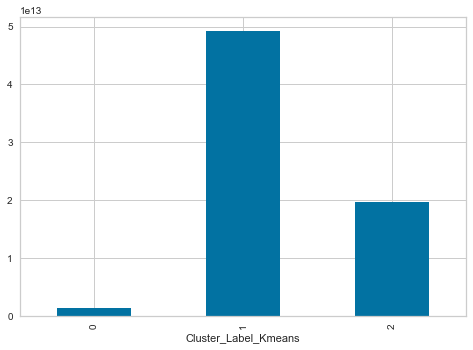

In [71]:
df_cluster_dropped.groupby('Cluster_Label_Kmeans')['GDP_dollar'].sum().plot(kind='bar') # grouping by the cluster labels and generating bar plot for GDP

<AxesSubplot: xlabel='Cluster_Label_Kmeans'>

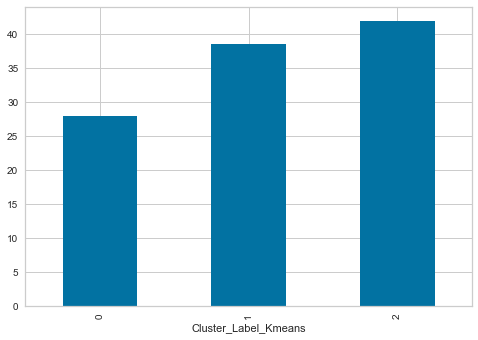

In [72]:
df_cluster_dropped.groupby('Cluster_Label_Kmeans')['Population 15-64'].sum().plot(kind='bar') # grouping by the cluster labels and generating bar plot for Population 15-64

<AxesSubplot: xlabel='Cluster_Label_Kmeans'>

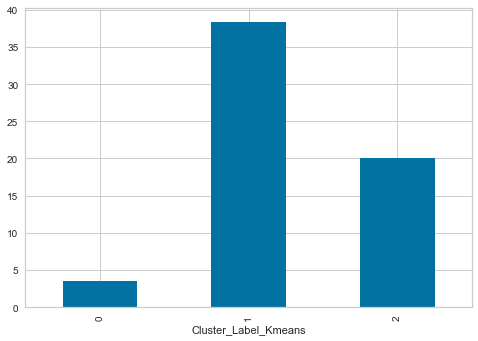

In [73]:
df_cluster_dropped.groupby('Cluster_Label_Kmeans')['Internet Usage'].sum().plot(kind='bar') # grouping by the cluster labels and generating bar plot for Internet Usage

<AxesSubplot: xlabel='Cluster_Label_Kmeans'>

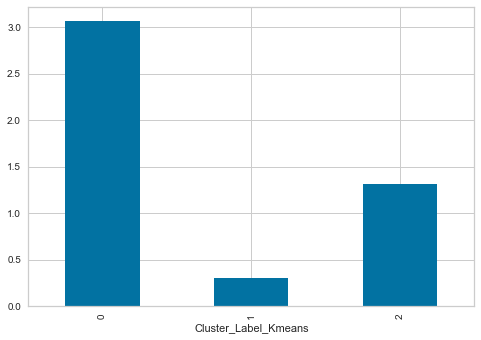

In [74]:
df_cluster_dropped.groupby('Cluster_Label_Kmeans')['Infant Mortality Rate'].sum().plot(kind='bar') # grouping by the cluster labels and generating bar plot for Infant Mortality Rate

<AxesSubplot: xlabel='Cluster_Label_Kmeans'>

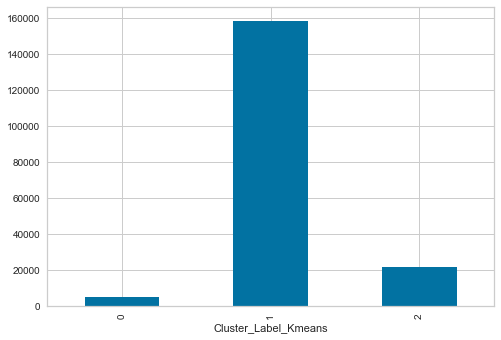

In [75]:
df_cluster_dropped.groupby('Cluster_Label_Kmeans')['Health_Exp_Capita_dollar'].sum().plot(kind='bar') # grouping by the cluster labels and generating bar plot for Health Exp per capita

* The highest GDP cluster is Cluster 1 which contains most of the european countries , UAE, USA Canada and Singapore
* The internet Usage is highest in the cluster 1 countries and in the middle is Cluster 2 which has countries such as India , Phillipines, Vietnam( the Growing or developing Economies) with medium GDP
* Cluster 2 has highest popualtion in 15-64 age range 
* Cluster 0 has small popualtion and low GDP countries present such as Ghana ,Djibouti among others
* The observation of infant mortality rate is inline with the GDP and Health Exp per capita observations as higher earning countries spend more on health care and have lower infant mortality such as in CLuster 1, and the opposite where Cluster 0 has low GDP and low Health Expenditure has the highest infant mortality rate 

#### Formulas
Evaluation Metrics :

1.   DunnIndex = (intercluster distance) /(divided by the highest
intracluster distance)
2.   CH Coefficient.       CH =(SSBM/(M−1))/(SSEM/M)
3.   silhouette_score.     s(i) = (b(i) −a(i))/max{a(i),b(i)}